# Gplearn Dry Run


In [4]:
# Install libraries
!pip install gplearn

In [5]:
# Call libraries
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor
import time

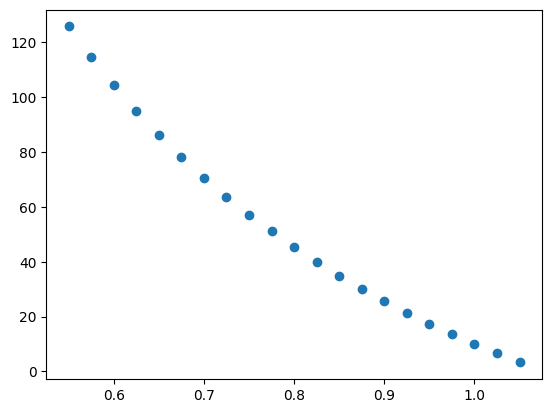

In [6]:
# Build Toy Dataset
x=np.arange(start=0.55,stop=1.075,step=0.025)
y=141.5/x-131.5
plt.plot(x,y,marker="o",linestyle="None")
plt.show()

In [7]:
t0 = time.time()
myMod=SymbolicRegressor(verbose=1)
myMod.fit(x.reshape(-1, 1),y)
y_pred=myMod.predict(x.reshape(-1, 1))
print("time to fit: ",time.time() - t0, 'seconds')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    48.57          1431.31        7          15.6164              N/A     53.18s
   1    61.98          57.6325       15          15.6072              N/A     54.32s
   2    93.06          78.4702      131          4.65623              N/A     58.35s
   3    98.53          46.8595      147          3.86275              N/A     38.00s
   4   130.08          38.1306      147          2.84133              N/A     34.59s
   5   138.26          35.4064      149          1.49115              N/A     25.71s
   6   142.25          48.7325      153          1.45068              N/A     24.29s
   7   148.79          44.9666      119            1.041              N/A     17.42s
   8   147.03          35.9036      143         0.961906              N/A  

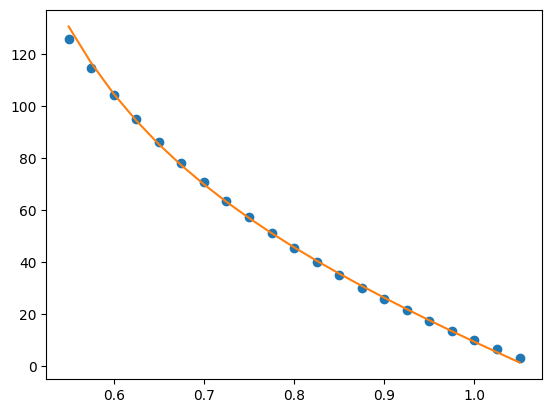

In [8]:
plt.plot(x,y,marker="o",linestyle="None")
plt.plot(x,y_pred)
plt.show()

In [9]:
converter = {
    'add': lambda x, y : x + y,
    'sub': lambda x, y : x - y,
    'mul': lambda x, y : x*y,
    'div': lambda x, y : x/y,
    'sqrt': lambda x : x**0.5,
    'log': lambda x : log(x),
    'abs': lambda x : abs(x),
    'neg': lambda x : -x,
    'inv': lambda x : 1/x,
    'max': lambda x, y : max(x, y),
    'min': lambda x, y : min(x, y),
    'sin': lambda x : sin(x),
    'cos': lambda x : cos(x),
    'pow': lambda x, y : x**y,
}
myEq = sym.sympify(str(myMod._program), locals=converter)
myEq

-14.0845070422535*(2.14400985221675 - 2.83218565025937*X0)*(-1.09646451109866*X0 - 0.143655/X0)*(X0 + 0.879)/(X0 - 0.119) - (0.98/X0 + 0.118064/X0**2)*(-2*X0 - 0.612) + 21.9154065307911/(X0 - 0.332) + (-0.867*X0 + 1.465/X0)*(-2*X0*(2.14400985221675 - 2.83218565025937*X0)*(X0 + 0.879) - 0.468281430219147)/(-X0 - 0.669)

In [10]:
sym.simplify(myEq)

(4.91100991754975*X0**8 - 45.3537030130083*X0**7 - 31.7173250173042*X0**6 + 37.0718429016151*X0**5 + 37.2459778127389*X0**4 + 8.31974808045765*X0**3 - 0.547303077220255*X0**2 - 0.816668835128473*X0 + 0.00190976565164314)/(X0**2*(1.0*X0**3 + 0.218*X0**2 - 0.262211*X0 + 0.026430852))